In [1]:
from astropy import constants as c, units as u
import numpy as np
from bilby import core,  gw

import matplotlib.pyplot as plt

In [2]:
duration = 4.
sampling_frequency = 2048.

injection_parameters = dict(
    mass_1=36., mass_2=29., a_1=0.4, a_2=0.3, tilt_1=0.5, tilt_2=1.0,
    phi_12=1.7, phi_jl=0.3, luminosity_distance=200., theta_jn=0.4, psi=2.659,
    phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

waveform_arguments = dict(waveform_approximant='IMRPhenomP',
                          minimum_frequency=20.)

In [3]:
waveform_generator = gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=gw.source.lal_binary_black_hole,
    waveform_arguments=waveform_arguments
)

00:15 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [4]:
h_plus = waveform_generator.frequency_domain_strain(parameters=injection_parameters)['plus']
h_cross = waveform_generator.frequency_domain_strain(parameters=injection_parameters)['cross']

/home/deep/miniconda3/envs/bilby/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Strain')

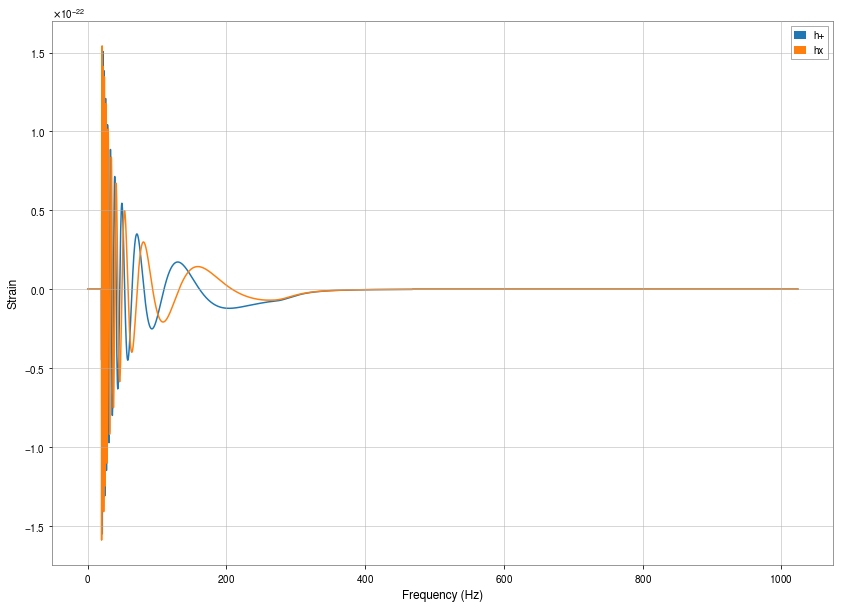

In [5]:
fig = plt.figure(figsize=(14, 10))
plt.plot(waveform_generator.frequency_array, h_plus, label='h+')
plt.plot(waveform_generator.frequency_array, h_cross, label='hx')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Strain')

In [6]:
quadrature_sum = (np.abs(h_plus)**2 + np.abs(h_cross)**2)**0.5

Text(0, 0.5, 'Strain')

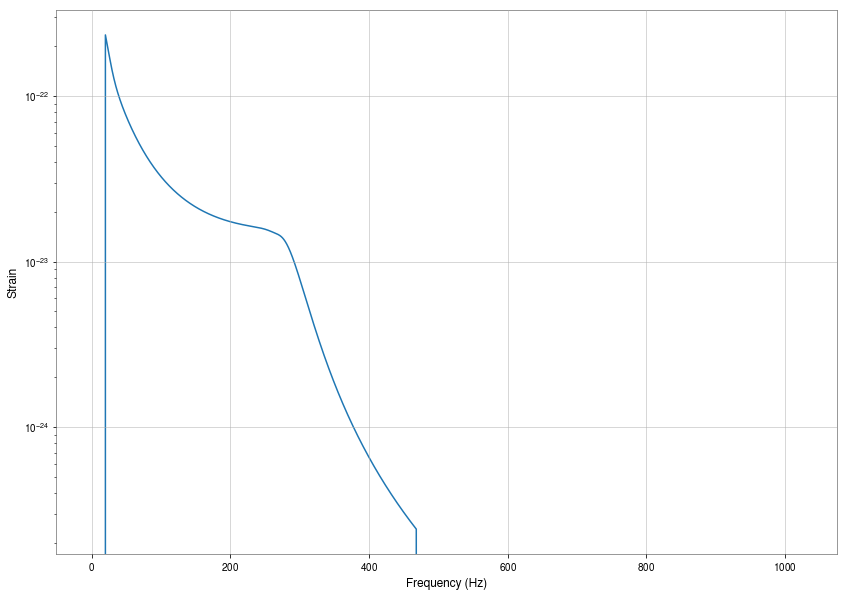

In [7]:
fig = plt.figure(figsize=(14, 10))
plt.plot(waveform_generator.frequency_array, quadrature_sum)
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Strain')

# Custom Waveform

In [8]:
def my_sine_wave(time, amplitude):
    return amplitude * np.sin(2*np.pi* (time / 2.))

In [9]:
custom_waveform = gw.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    time_domain_source_model=my_sine_wave,
    parameters={'amplitude': 10}
)

00:15 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: None
  time_domain_source_model: __main__.my_sine_wave
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


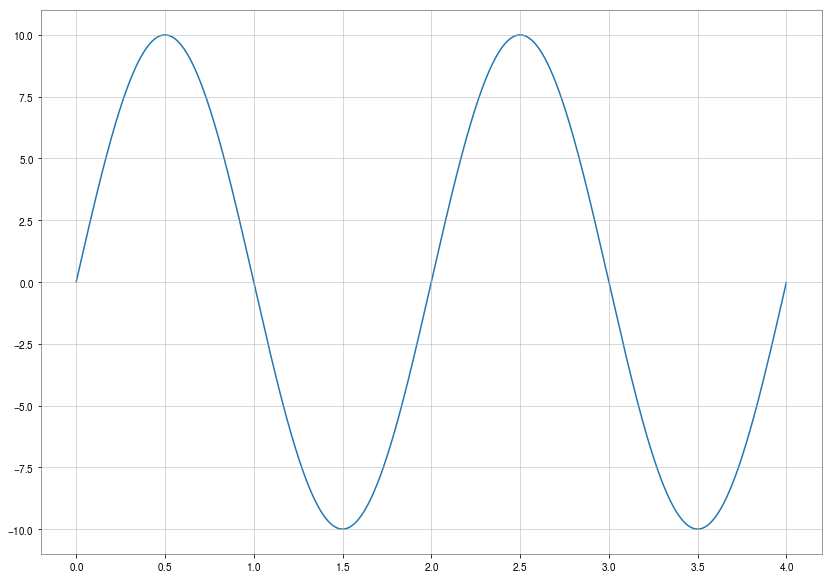

In [10]:
fig = plt.figure(figsize=(14, 10))
plt.plot(custom_waveform.time_array, custom_waveform.time_domain_strain())

(0, 1)

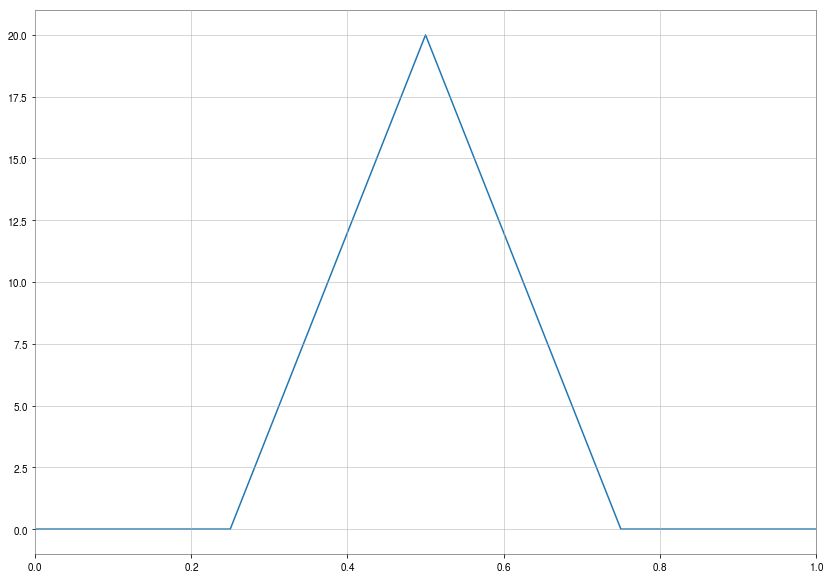

In [11]:
fig = plt.figure(figsize=(14, 10))
plt.plot(custom_waveform.frequency_array, np.abs(custom_waveform.frequency_domain_strain()[0]))
plt.xlim((0, 1))